In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
vec = pd.read_csv('learning_vectors7.csv', sep=',')



FileNotFoundError: File b'learning_vectors7.csv' does not exist

In [23]:
vec['TMV_diff'] = vec['H_TMV'] - vec['A_TMV']
vec.head()

,Match_id,League_id,Season,Stage,Date,H_team,A_team,Result,B365H,B365D,...,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth,H_age,A_age,H_TMV,A_TMV,TMV_diff
0,1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,1.20,6.5,...,70,70,70,70,70,21.3,24.6,250.0,64.0,186.0
1,1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,5.50,3.6,...,40,50,60,60,40,24.9,23.9,91.0,257.0,-166.0
2,1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,1.91,3.4,...,35,70,70,70,35,24.3,25.7,80.0,61.0,19.0
3,1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,2.00,3.3,...,45,60,70,70,45,24.4,26.4,162.0,86.0,76.0
4,1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,3.20,3.4,...,50,50,65,50,50,22.3,22.5,73.0,212.0,-139.0


Alg/res.mean/res.std
LR: 0.541776 (0.012710)
LDA: 0.536842 (0.016506)
KNN: 0.481908 (0.010282)
CART: 0.431086 (0.005817)
NB: 0.451974 (0.008765)
SVM: 0.472368 (0.005243)


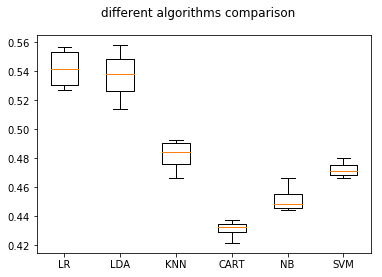

In [28]:
predictors = ['B365H', 'B365D', 'B365A',
                   'H_Speed', 'H_Pass','H_Shoot', 'H_Pressure', 
                   'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                   'A_Speed', 'A_Pass','A_Shoot', 'A_Pressure',
                   'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
                   'H_age','A_age','H_TMV','A_TMV']

predictors2 = ['B365H', 'B365D', 'B365A','TMV_diff']

X = vec[predictors]
y = vec['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC())) 

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y, 
                                          cv=cross_validator, 
                                          scoring = 'accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)
    
    

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [32]:
act_vec = pd.read_csv('learning_vectors7.csv', sep=',')
act_vec.dtypes

Match_id        int64
League_id       int64
Season         object
Stage           int64
Date           object
H_team         object
A_team         object
Result          int64
B365H         float64
B365D         float64
B365A         float64
H_Speed         int64
H_Pass          int64
H_Shoot         int64
H_Pressure      int64
H_chPass        int64
H_chCross       int64
H_dAggr         int64
H_dWidth        int64
A_Speed         int64
A_Pass          int64
A_Shoot         int64
A_Pressure      int64
A_chPass        int64
A_chCross       int64
A_dAggr         int64
A_dWidth        int64
H_age         float64
A_age         float64
H_TMV         float64
A_TMV         float64
dtype: object